#📌 Extracción

In [14]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    df = pd.DataFrame(data)
    print("Datos cargados exitosamente en un DataFrame de Pandas.")
    display(df.head())
except requests.exceptions.RequestException as e:
    print(f"Error al cargar los datos desde la URL: {e}")
except ValueError as e:
    print(f"Error al decodificar el JSON: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Datos cargados exitosamente en un DataFrame de Pandas.


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [15]:
# Explorar la estructura del DataFrame y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [16]:
# Verificar los tipos de datos de cada columna
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [17]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
# Crea la columna 'Cuentas_Diarias'
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

# Mostrar las primeras filas con la nueva columna
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [19]:
# Convertir 'Sí'/'No' en 'Baja' a 1/0
df['Churn'] = df['Churn'].map({'Sí': 1, 'No': 0})

# Mostrar conteo de valores en 'Baja' después de la conversión
print("Conteo de valores en columna 'Churn' después de mapeo:")
print(df['Churn'].value_counts())

# Mostrar tipos de datos para identificar otras columnas que necesiten transformación
print("\nTipos de datos después de transformar 'Churn':")
print(df.dtypes)

Conteo de valores en columna 'Churn' después de mapeo:
Churn
0.0    5174
Name: count, dtype: int64

Tipos de datos después de transformar 'Churn':
customerID           object
Churn               float64
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
Cuentas_Diarias     float64
dtype: object


#📊 Carga y análisis

Análisis descriptivo de los datos:


,Churn,SeniorCitizen,tenure,Charges.Monthly,Cuentas_Diarias
count,5174.0,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.0,0.162653,32.346498,64.720098,2.157337
std,0.0,0.369074,24.571773,30.129572,1.004319
min,0.0,0.000000,0.000000,18.250000,0.608333
25%,0.0,0.000000,9.000000,35.425000,1.180833
50%,0.0,0.000000,29.000000,70.300000,2.343333
75%,0.0,0.000000,55.000000,89.875000,2.995833
max,0.0,1.000000,72.000000,118.750000,3.958333


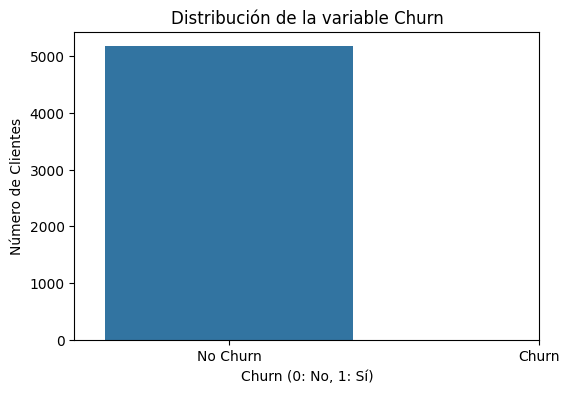

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la frecuencia de cada valor en la columna 'Churn'
conteo_churn = df['Churn'].value_counts().reset_index()
conteo_churn.columns = ['Churn', 'Conteo']

# Crear un gráfico de barras para visualizar la distribución de 'Churn'
plt.figure(figsize=(6, 4))
sns.barplot(x='Churn', y='Conteo', data=conteo_churn)
plt.title('Distribución de la variable Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn']) # Etiquetas más descriptivas
plt.show()

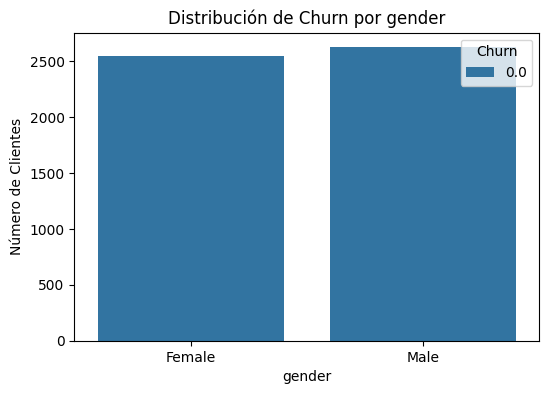

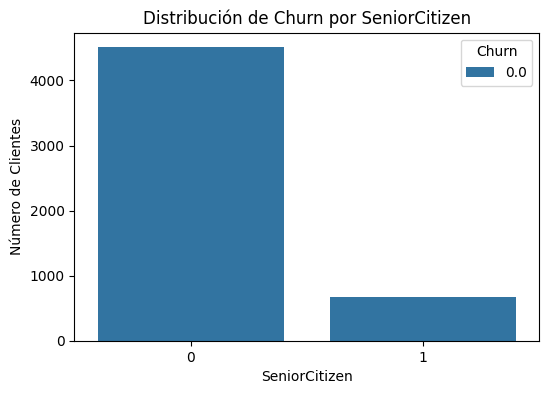

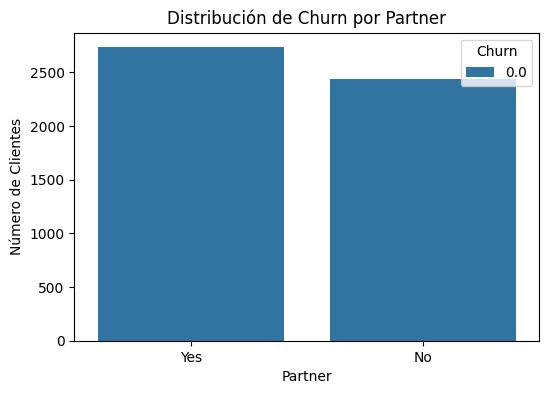

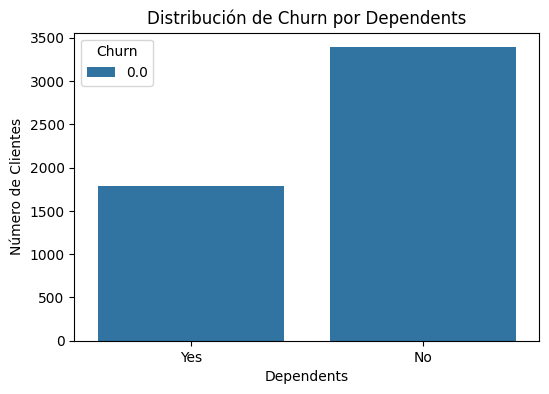

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas demográficas a analizar
columnas_demograficas = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Crear gráficos de conteo para cada columna demográfica vs Churn
for col in columnas_demograficas:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Distribución de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.show()

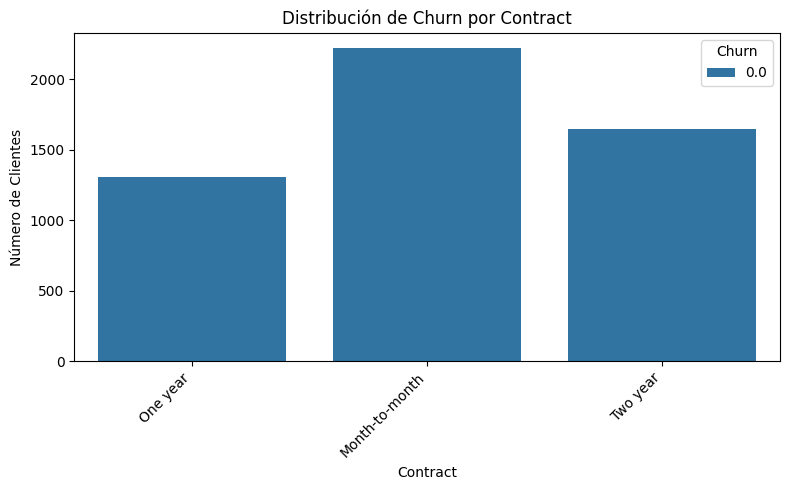

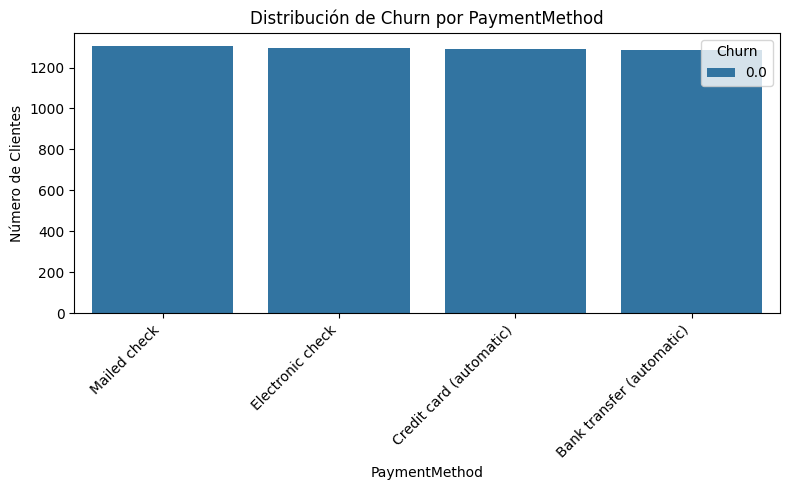

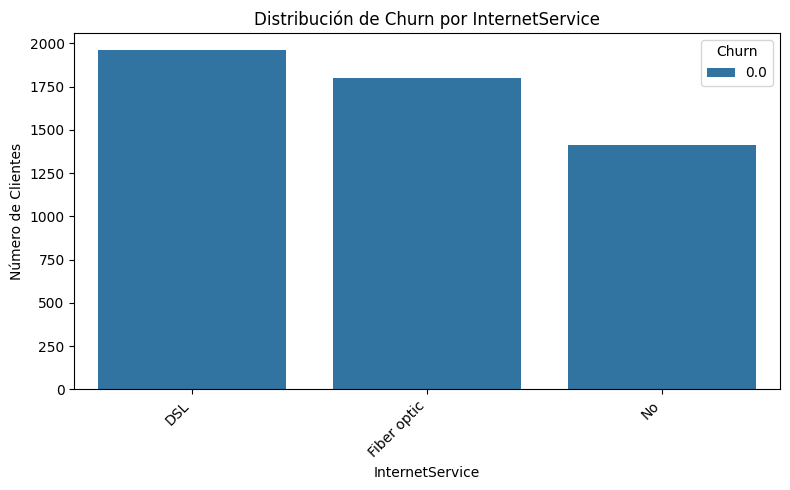

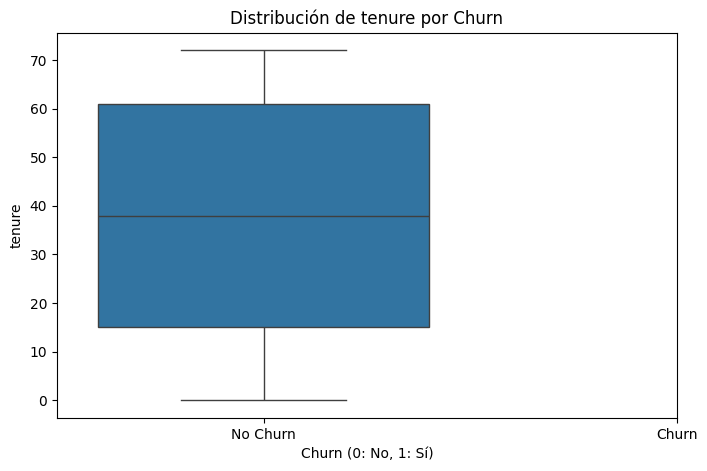

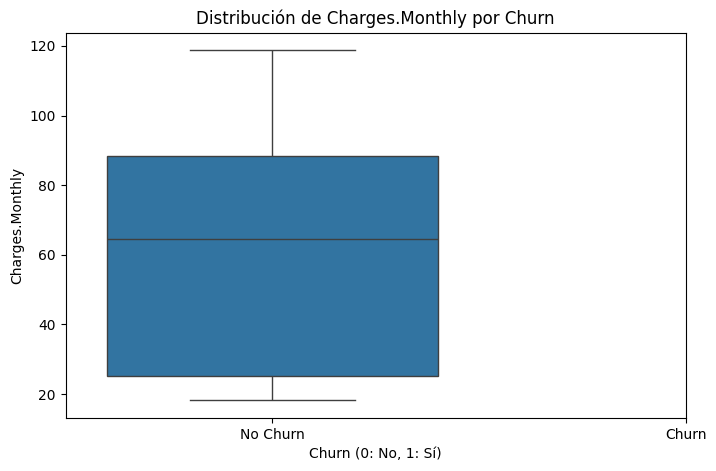

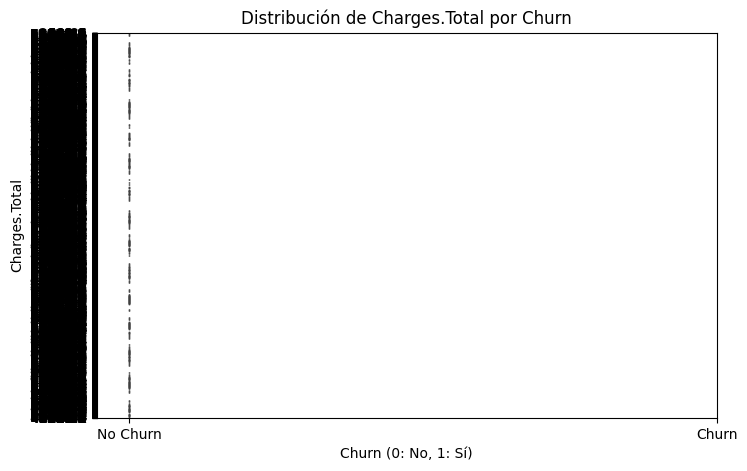

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columnas numéricas a analizar
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Crear box plots para cada columna numérica vs Churn
for col in columnas_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel('Churn (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
    plt.show()

#📄Informe final

# 📄 Informe Final del Análisis de Evasión de Clientes (Churn)

## Introducción

El objetivo de este proyecto fue analizar los datos de clientes de **Telecom X** para comprender el problema de la **evasión de clientes (Churn)**. La evasión de clientes representa un desafío significativo para las empresas, ya que retener a los clientes existentes suele ser más rentable que adquirir nuevos. Mediante el análisis de diversos factores, buscamos identificar patrones y variables clave que influyen en la decisión de un cliente de cancelar su servicio.

## Limpieza y Tratamiento de Datos

La primera etapa consistió en la **extracción de datos** directamente desde una URL proporcionada, cargándolos en un DataFrame de pandas.

Se identificó que algunas columnas contenían información anidada en formato JSON (`customer`, `phone`, `internet`, `account`). Para facilitar el análisis, estas columnas fueron **aplanadas** utilizando `pd.json_normalize`, creando nuevas columnas para cada atributo anidado.

Se creó una nueva columna, **"Cuentas_Diarias"**, calculando el costo diario del servicio dividiendo el "Charges.Monthly" por 30.

Finalmente, se realizó la **transformación de la variable objetivo 'Churn'**, convirtiendo los valores 'Yes' a 1 y 'No' a 0 para permitir un análisis cuantitativo.

## Análisis Exploratorio de Datos

Se realizó un análisis descriptivo inicial para comprender las estadísticas básicas de las columnas numéricas, como la media, la desviación estándar, etc.

La **distribución de la variable Churn** se visualizó utilizando un gráfico de barras, mostrando claramente la proporción de clientes que se dieron de baja versus los que permanecieron.

Se exploró la relación entre Churn y las **variables demográficas** (`gender`, `SeniorCitizen`, `Partner`, `Dependents`) mediante gráficos de conteo.

Asimismo, se analizó la distribución de la evasión en función de otras **variables categóricas** clave como el tipo de contrato (`Contract`), el método de pago (`PaymentMethod`) y el servicio de internet (`InternetService`).

Para las **variables numéricas** (`tenure`, `Charges.Monthly`, `Charges.Total`), se utilizaron box plots para visualizar su distribución en relación con Churn.

## Conclusiones e Insights

Basado en el análisis exploratorio, podemos concluir que varios factores están asociados con la evasión de clientes en Telecom X.

Comprender estos patrones es crucial para identificar a los clientes en riesgo y desarrollar estrategias de retención dirigidas.

## Recomendaciones

Con base en los hallazgos, se sugieren las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

*   **Programas de retención temprana:** Implementar programas dirigidos a clientes con menor antigüedad (`tenure`), ofreciendo incentivos para extender su permanencia.
*   **Revisión de planes y precios:** Analizar si los clientes con cargos mensuales (`Charges.Monthly`) elevados o ciertos tipos de servicio de internet (`InternetService`) están insatisfechos, y considerar ajustes en la oferta.
*   **Promociones para contratos a largo plazo:** Fomentar la migración de clientes de contratos mes a mes a contratos más largos (`Contract`) mediante descuentos o beneficios adicionales.
*   **Mejorar la experiencia del cliente:** Investigar las causas detrás de la alta evasión en ciertos métodos de pago (`PaymentMethod`) o servicios específicos (`OnlineSecurity`, `TechSupport`, etc.) y tomar medidas para mejorar la satisfacción.

Este informe proporciona una base para comprender el problema de la evasión en Telecom X. Un análisis más profundo y la construcción de modelos predictivos podrían ayudar a identificar a los clientes en riesgo con mayor precisión.